# AdaptCL and Baselines
Run AdaptCL(DynamicSparse), EWC, LwF, SML, and SGD in this Notebook, with MNIST, DomainNet, Food and FreshStale datasets

In [5]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
import shutil
import random
import time
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchsummary import summary
from torchvision import transforms, datasets
import tensorflow
import tarfile, requests, os

from utils import *
from Baseline_models import *
from dataloader import *
import torchvision.models as models
set_all_seed(5)


## (Optional) For MNIST Datasets, Run this

Image Shape: torch.Size([1, 32, 32])
Training Set:   60000 samples
Validation Set:   10000 samples

Image Shape: torch.Size([1, 32, 32])
Training Set:   60000 samples
Validation Set:   10000 samples

Image Shape: torch.Size([1, 32, 32])
Training Set:   60000 samples
Validation Set:   10000 samples

Image Shape: torch.Size([1, 32, 32])
Training Set:   60000 samples
Validation Set:   10000 samples

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
      MaskedConv2d-1            [-1, 6, 28, 28]             156
         AvgPool2d-2            [-1, 6, 14, 14]               0
      MaskedConv2d-3           [-1, 16, 10, 10]           2,416
         AvgPool2d-4             [-1, 16, 5, 5]               0
         MaskedMLP-5                  [-1, 120]          48,120
         MaskedMLP-6                   [-1, 84]          10,164
         MaskedMLP-7                   [-1, 10]             850
Total params: 61,706
Tr

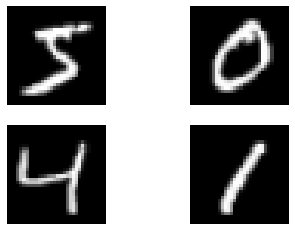

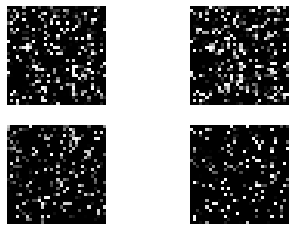

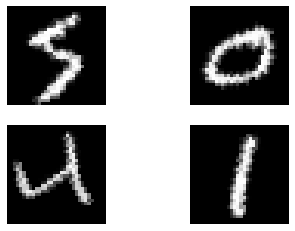

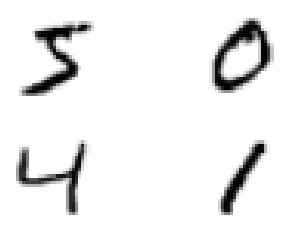

In [9]:
mnist_train_loader, mnist_val_loader = load_mnist()
permute_train_loader, permute_val_loader = load_permute_mnist()
rotated_train_loader, rotated_val_loader = load_rotated_mnist()
inverted_train_loader, inverted_val_loader = load_inverted_mnist()

from torch.optim.sgd import SGD
from torch.optim.optimizer import required
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear) or isinstance(m,MaskedConv2d) or isinstance(m,MaskedMLP):
        m.reset_parameters()


model = MaskedResNet(1, MaskedBasicBlock, [2, 2, 2, 2]) #resnet18
model = vgg(depth=16)
# model = MaskedLeNet5()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.apply(weight_reset)
summary(model, (1, 32, 32))


criterion = nn.CrossEntropyLoss()
optimizer1 = SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)

# task 1
task_1 = [mnist_train_loader, mnist_val_loader]
# task 2
task_2 = [permute_train_loader, permute_val_loader]
# task 3
task_3 = [inverted_train_loader, inverted_val_loader]

## (Optional) For DomainNet Datasets, Run this

In [ ]:
domain1_train_loader, domain1_val_loader = load_domain1()
domain2_train_loader, domain2_val_loader = load_domain2()
domain3_train_loader, domain3_val_loader = load_domain3()

from torch.optim.sgd import SGD
from torch.optim.optimizer import required
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear) or isinstance(m,MaskedConv2d) or isinstance(m,MaskedMLP):
        m.reset_parameters()
        
# model = ResNet(3, BasicBlock, [2, 2, 2, 2]) #resnet18
model = MaskedResNet(3, MaskedBasicBlock, [2, 2, 2, 2]) #resnet18
# model = LeNet5()
# model = MaskedLeNet5()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.apply(weight_reset)
summary(model, (3, 32, 32))


criterion = nn.CrossEntropyLoss()
optimizer1 = SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)


# task 1
task_1 = [domain1_train_loader, domain1_val_loader]
# task 2
task_2 = [domain2_train_loader, domain2_val_loader]
# task 3
task_3 = [domain3_train_loader, domain3_val_loader]

## (Optional) For Food Datasets, Run this

Image Shape: torch.Size([4, 32, 32])
Training Set:   91 samples
Validation Set:   93 samples

Image Shape: torch.Size([4, 32, 32])
Training Set:   55 samples
Validation Set:   57 samples

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
      MaskedConv2d-1           [-1, 64, 32, 32]           2,304
       BatchNorm2d-2           [-1, 64, 32, 32]             128
      MaskedConv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
      MaskedConv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
  MaskedBasicBlock-7           [-1, 64, 32, 32]               0
      MaskedConv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
     MaskedConv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32,

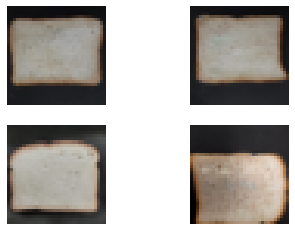

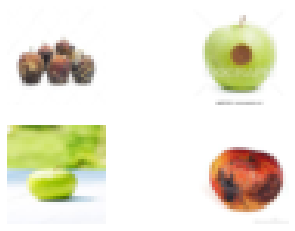

In [6]:
bread_train_loader, bread_val_loader = load_bread()
apple_train_loader, apple_val_loader = load_apple()

from torch.optim.sgd import SGD
from torch.optim.optimizer import required
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear) or isinstance(m,MaskedConv2d) or isinstance(m,MaskedMLP):
        m.reset_parameters()
        
# model = ResNet(4, BasicBlock, [2, 2, 2, 2]) #resnet18
model = MaskedResNet(4, MaskedBasicBlock, [2, 2, 2, 2]) #resnet18

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.apply(weight_reset)
summary(model, (4, 32, 32))


criterion = nn.CrossEntropyLoss()
optimizer1 = SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)


# task 1
task_1 = [bread_train_loader, bread_val_loader]
# task 2
task_2 = [apple_train_loader, apple_val_loader]


## (Optional) For FreshStale Datasets, Run this

Image Shape: torch.Size([3, 64, 64])
Training Set:   3835 samples
Validation Set:   200 samples

Image Shape: torch.Size([3, 64, 64])
Training Set:   2861 samples
Validation Set:   200 samples

Image Shape: torch.Size([3, 64, 64])
Training Set:   2848 samples
Validation Set:   200 samples

Image Shape: torch.Size([3, 64, 64])
Training Set:   1763 samples
Validation Set:   200 samples

Image Shape: torch.Size([3, 64, 64])
Training Set:   1692 samples
Validation Set:   200 samples

Image Shape: torch.Size([3, 64, 64])
Training Set:   184 samples
Validation Set:   500 samples

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1

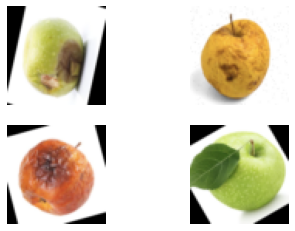

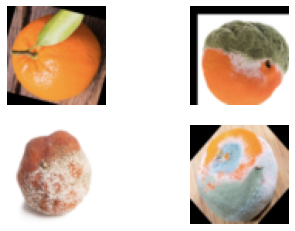

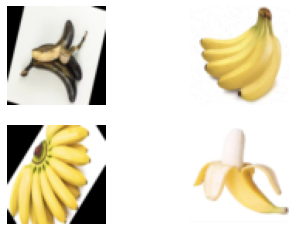

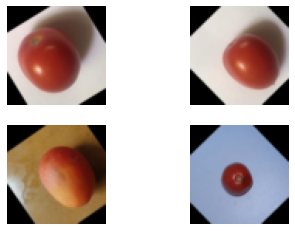

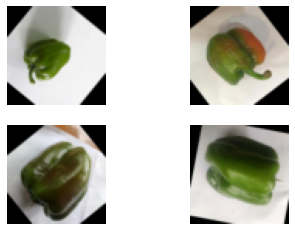

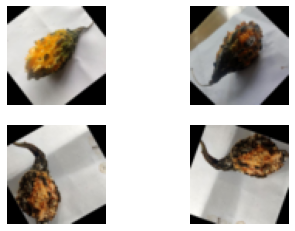

In [17]:
FS_apple_train_loader, FS_apple_val_loader = loadFS_apple()
FS_orange_train_loader, FS_orange_val_loader = loadFS_orange()
FS_banana_train_loader, FS_banana_val_loader = loadFS_banana()
FS_tomato_train_loader, FS_tomato_val_loader = loadFS_tomato()
FS_capsicum_train_loader, FS_capsicum_val_loader = loadFS_capsicum()
FS_gourd_train_loader, FS_gourd_val_loader = loadFS_gourd()

from torch.optim.sgd import SGD
from torch.optim.optimizer import required
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear) or isinstance(m,MaskedConv2d) or isinstance(m,MaskedMLP):
        m.reset_parameters()
        
model = ResNet(3, BasicBlock, [2, 2, 2, 2],num_classes=2) #resnet18
# model = MaskedResNet(3, MaskedBasicBlock, [2, 2, 2, 2],num_classes=2) #resnet18
# model = LeNet5()
# model = MaskedLeNet5()
                     
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.apply(weight_reset)
summary(model, (3, 64,64))


criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)

# task 1
task_1 = [FS_apple_train_loader, FS_apple_val_loader]
# task 2
task_2 = [FS_orange_train_loader, FS_orange_val_loader]
# task 3
task_3 = [FS_banana_train_loader, FS_banana_val_loader]
# task 4
task_4 = [FS_tomato_train_loader, FS_tomato_val_loader]
# task 5
task_5 = [FS_capsicum_train_loader, FS_capsicum_val_loader]
# task 6
task_6 = [FS_gourd_train_loader, FS_gourd_val_loader]




In [ ]:

EWC = False
DynamicSparse = False
LWF = False

# task list
tasks = [task_1,task_2,task_3]
# tasks = [task_3]
# tasks = [task_2]
# tasks = [task_5]

#EWC
if EWC:
    fisher_dict = {}
    optpar_dict = {}
    ewc_lambda = 1

#DynamicSparse
if DynamicSparse:
    alpha = 1e-5

# hyper parameters for Learning without Forgetting
if LWF:
    # alpha is the trade off hyper-parameter that to adjust the importance of the previous task
    # the larger alpha is, the more important the previous task is
    lwf_alpha = 1
    # T means temperature. Temperature is a common setting for knowledge distillation, for more details
    # please refer to https://intellabs.github.io/distiller/knowledge_distillation.html
    lwf_T = 2 
    
    # Previous task's net
    pre_net = None

    
EPOCHS = 20

set_all_seed(5)

Bstep = BinaryStep.apply

Conv_weight=[]
accs_DS_A = []
accs_DS_B = []
accs_DS_C = []
accs_DS_D = []
accs_DS_E = []
accs_DS_F = []
    
#validation first
def train():
    global model
    global pre_net
    global optimizer
    #------------------------------------------------
    #            INITIAL VALIDATION b_i 
    #------------------------------------------------
    print('-'*85)
    B_i = []

    for id1, task in enumerate(tasks):
        correct_val = 0
        Train_loader1, Val_loader1 = tasks[id1] #data_loader of each task
        NB_TRAIN_EXAMPLES = len(Train_loader1.dataset)
        NB_VAL_EXAMPLES = len(Val_loader1.dataset)
        if device == "cuda":
            model.eval().cuda()

        with torch.no_grad():
            for inputs, labels in Val_loader1:
                # Load data to GPU.
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass.
                prediction = model(inputs)

                # Compute training accuracy.
                _, predicted = torch.max(prediction.data, 1)
                correct_val += (predicted == labels).sum().item()

            val_acc =  correct_val / NB_VAL_EXAMPLES
            B_i.append(val_acc)


        info = "[b_{}]: val-acc = {:0.6f}"
        print(info.format(id1+1, val_acc))
    print('-'*85)
    

    
    R_ii = []
    R_li = [] # R_(i-1)i
    for id2, task in enumerate(tasks):
        

        train_costs, val_costs = [], []

    
        Train_loader2, Val_loader2 = tasks[id2] #data_loader of each task
        NB_TRAIN_EXAMPLES = len(Train_loader2.dataset)
        NB_VAL_EXAMPLES = len(Val_loader2.dataset)
        #------------------------------------------------
        #        BEFORE TASK VALIDATION R_(i-1)i
        #------------------------------------------------
        
        correct_val = 0

        if device == "cuda":
            model.eval().cuda()

        with torch.no_grad():
            for inputs, labels in Val_loader2:
                # Load data to GPU.
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass.
                prediction = model(inputs)

                # Compute training accuracy.
                _, predicted = torch.max(prediction.data, 1)
                correct_val += (predicted == labels).sum().item()

            val_acc =  correct_val / NB_VAL_EXAMPLES
            R_li.append(val_acc)


        print('-'*85)
        info = "[R_{}{}]: val-acc = {:0.6f}"
        print(info.format(id2, id2+1, val_acc))


        #------------------------------------------------
        #                 TRAINING
        #------------------------------------------------

        
        #Training phase.
        for epoch in range(EPOCHS):

            # Measure the elapsed time of each epoch
            t0_epoch, t0_batch = time.time(), time.time()


            train_loss, correct_train = 0, 0
            batch_loss, correct_batch, batch_counts = 0, 0, 0

            if device == "cuda":
                model.train().cuda()

            for step, (inputs, labels) in enumerate(Train_loader2):
                
                # Load data to GPU.
                inputs, labels = inputs.to(device), labels.to(device)

                # Zero the parameter gradients.
                optimizer.zero_grad()

                # Forward pass.
                prediction = model(inputs)
                
                if LWF and id2 > 0:
                    pred_old = pre_net(inputs)

                # Compute the loss.
                loss = criterion(prediction, labels)
                
                # Dynamic sparse
                if DynamicSparse:
                    for layer in model.modules():
                        if isinstance(layer, MaskedMLP) or isinstance(layer, MaskedConv2d):
                            loss += alpha * torch.sum(torch.exp(-layer.threshold)) #
                
                #LWF
                if LWF and id2 > 0:
                    """compute the cross entropy loss between current model output and previous model output
                    Note that we can't note directly use the nn.CrossEntropyLoss()(prediction, pred_old) to compute the loss
                    because the pred_old is not the ground truth label, it is the output of previous model, which is a logits before 
                    entering the softmax function. Therefore, we implement the cross entropy loss by ourselves.
                    """
                    softmax_cur = torch.nn.functional.softmax(prediction / lwf_T, dim=1)
                    softmax_old = torch.nn.functional.softmax(pred_old / lwf_T, dim=1)
                    l2 = torch.mean(torch.sum(-softmax_old * torch.log(softmax_cur), dim=1))

                    loss += lwf_alpha * l2      
                    
                    
                # EWC
                if EWC and id2 > 0:
                    for task in range(id2):
                        for name, param in model.named_parameters():
                            fisher = fisher_dict[task][name]
                            optpar = optpar_dict[task][name]
                            loss += (fisher * (optpar - param).pow(2)).sum() * ewc_lambda 
                            #optpar=\theta_i, param=\theta_A*

                # Backward pass.
                loss.backward()

                #freeze trained parameters
                if DynamicSparse and id2 > 0:
                    for layer in model.modules():
                        if isinstance(layer, MaskedMLP) or isinstance(layer, MaskedConv2d):
                            layer.weight.grad.data[layer.task_mask.type(torch.bool)] = 0
                            if layer.bias is not None:
                                layer.bias.grad.data.fill_(0)
                        elif 'BatchNorm' in str(type(layer)):
                            # Set grads of batchnorm params to 0.
                            layer.weight.grad.data.fill_(0)
                            layer.bias.grad.data.fill_(0)

                # Optimize.
                optimizer.step()

                # Compute training accuracy.
                _, predicted = torch.max(prediction.data, 1)
                correct_train += (predicted == labels).sum().item()
                correct_batch += (predicted == labels).sum().item()

                # Compute batch loss.
                batch_loss += (loss.data.item() * inputs.shape[0])
                train_loss += (loss.data.item() * inputs.shape[0])

                batch_counts += inputs.shape[0]
                
            train_loss /= NB_TRAIN_EXAMPLES
            train_costs.append(train_loss)
            train_acc =  correct_train / NB_TRAIN_EXAMPLES

            time_elapsed = time.time() - t0_epoch
            
            #------------------------------------------------
            #           print_layer_keep_ratio
            #------------------------------------------------
            if DynamicSparse:
                total = 0. 
                keep = 0.
                for layer in model.modules():
                    if isinstance(layer, MaskedMLP):
                        abs_weight = torch.abs(layer.weight)
                        threshold = layer.threshold.view(abs_weight.shape[0], -1)
                        abs_weight = abs_weight-threshold
                        mask = layer.step(abs_weight)
                        ratio = torch.sum(mask) / mask.numel()
                        total += mask.numel()
                        keep += torch.sum(mask)
                    if isinstance(layer, MaskedConv2d):
                        weight_shape = layer.weight.shape 
                        threshold = layer.threshold.view(weight_shape[0], -1)
                        weight = torch.abs(layer.weight)
                        weight = weight.view(weight_shape[0], -1)
                        weight = weight - threshold
                        mask = layer.step(weight)
                        ratio = torch.sum(mask) / mask.numel()
                        total += mask.numel()
                        keep += torch.sum(mask) 
        
                info = "[Epoch{}/{}]:train-loss={:0.6f} |train-acc={:0.6f} |time_elapsed={:0.2f} |Model keep ratio={:0.4f}"
                print(info.format(epoch+1, EPOCHS, train_loss, train_acc, time_elapsed, keep/total))
                
            else:
                info = "[Epoch{}/{}]:train-loss={:0.6f} |train-acc={:0.6f} |time_elapsed={:0.2f}"
                print(info.format(epoch+1, EPOCHS, train_loss, train_acc, time_elapsed))
            
            #------------------------------------------------
            #            Epoch wise VALIDATION R_Ti 
            #------------------------------------------------

            for id3, task in enumerate(tasks):
                correct_val = 0

                Train_loader3, Val_loader3 = tasks[id3] #data_loader of each task
                NB_TRAIN_EXAMPLES3 = len(Train_loader3.dataset)
                NB_VAL_EXAMPLES3 = len(Val_loader3.dataset)
                if device == "cuda":
                    model.eval().cuda()

                with torch.no_grad():
                    for inputs, labels in Val_loader3:
                        # Load data to GPU.
                        inputs, labels = inputs.to(device), labels.to(device)

                        # Forward pass.
                        prediction = model(inputs)

                        # Compute training accuracy.
                        _, predicted = torch.max(prediction.data, 1)
                        correct_val += (predicted == labels).sum().item()

                    val_acc =  correct_val / NB_VAL_EXAMPLES3
                    info = "id{},acc{}"
                    print(id3, val_acc)
                
                if id3 == 0:
                    accs_DS_A.append(val_acc)
                if id3 == 1:
                    accs_DS_B.append(val_acc)
                if id3 == 2:
                    accs_DS_C.append(val_acc)
                if id3 == 3:
                    accs_DS_D.append(val_acc)
                if id3 == 4:
                    accs_DS_E.append(val_acc)
                if id3 == 5:
                    accs_DS_F.append(val_acc)      
                
        #------------------------------------------------
        #    Update Dynamic task mask, reset threshold
        #------------------------------------------------
        if DynamicSparse:
            print('collecting task mask for task %s'%(id2+1))
            for layer in model.modules():
                if isinstance(layer, MaskedMLP) or isinstance(layer, MaskedConv2d):
                    layer.task_mask = Bstep(layer.task_mask.to(device)+layer.mask.to(device))
                    layer.reset_threshold()
            
        #------------------------------------------------
        #                 Update EWC
        #------------------------------------------------

        if EWC:
            print('training with EWC')
            if device == "cuda":
                model.train().cuda()
            optimizer.zero_grad()

            # accumulating gradients for the trained dataset
            for step, (inputs, labels) in enumerate(Train_loader2):

                # Load data to GPU.
                inputs, labels = inputs.to(device), labels.to(device)
                prediction = model(inputs)
                loss = criterion(prediction, labels)

                # Backward pass.
                loss.backward()

            fisher_dict[id2] = {}
            optpar_dict[id2] = {}

            # gradients accumulated can be used to calculate fisher
            for name, param in model.named_parameters():
                optpar_dict[id2][name] = param.data.clone() #optpar=\theta_i
                fisher_dict[id2][name] = param.grad.data.clone().pow(2) #fisher=F_i
                

            
        #------------------------------------------------
        #              ON TASK VALIDATION R_ii
        #------------------------------------------------

        
        val_loss = 0
        correct_val = 0

        if device == "cuda":
            model.eval().cuda()

        with torch.no_grad():
            for inputs, labels in Val_loader2:
                # Load data to GPU.
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass.
                prediction = model(inputs)

                # Compute the loss.
                loss = criterion(prediction, labels)

                # Compute training accuracy.
                _, predicted = torch.max(prediction.data, 1)
                correct_val += (predicted == labels).sum().item()

                # Compute batch loss.
                val_loss += (loss.data.item() * inputs.shape[0])

            val_loss /= NB_VAL_EXAMPLES
            val_costs.append(val_loss)
            val_acc =  correct_val / NB_VAL_EXAMPLES
            R_ii.append(val_acc)


        print('-'*85)
        info = "[R_{}{}]: val-acc = {:0.6f}"
        print(info.format(id2+1, id2+1, val_acc))
        
        #------------------------------------------------
        #                 Update LWF
        #------------------------------------------------
        
        """
        LWF: update the previous model
        """
        if LWF and id2 < (len(tasks)-1):
            print('training with LWF')
            pre_net = model
#             model = get_model()
#             optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)
        
    #------------------------------------------------
    #            FINAL VALIDATION R_Ti 
    #------------------------------------------------

        
    R_Ti = []
    
    for id4, task in enumerate(tasks):
        correct_val = 0
        
        Train_loader4, Val_loader4 = tasks[id4] #data_loader of each task
        NB_TRAIN_EXAMPLES = len(Train_loader4.dataset)
        NB_VAL_EXAMPLES = len(Val_loader4.dataset)
        if device == "cuda":
            model.eval().cuda()

        with torch.no_grad():
            for inputs, labels in Val_loader4:
                # Load data to GPU.
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass.
                prediction = model(inputs)

                # Compute training accuracy.
                _, predicted = torch.max(prediction.data, 1)
                correct_val += (predicted == labels).sum().item()

            val_acc =  correct_val / NB_VAL_EXAMPLES
            R_Ti.append(val_acc)

        print('-'*85)
        info = "[R_T{}]: val-acc = {:0.6f}"
        print(info.format(id4+1, val_acc))

    #------------------------------------------------
    #                 EVALUATION 
    #------------------------------------------------
    ACC = np.mean(R_Ti)
    BWT = 0
    for r_ti,r_ii in zip(R_Ti, R_ii):
        BWT += r_ti - r_ii
    BWT = BWT/(len(R_Ti)-1)
    FWT = 0
    for r_li,b_i in zip(R_li,B_i):
        FWT += r_li - b_i
    FWT = FWT/(len(B_i)-1)
    
    print('-'*85)
    info = "ACC = {}, BWT = {}, FWT = {}"
    print(info.format(ACC, BWT, FWT))

#
train()
print(accs_DS_A)
print(accs_DS_B)
print(accs_DS_C)
print(accs_DS_D)
print(accs_DS_E)
print(accs_DS_F)

In [5]:
#30 epochs EWC lambda = 1
train()

-------------------------------------------------------------------------------------
[b_1]: val-acc = 0.021505
[b_2]: val-acc = 0.052632
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
[R_01]: val-acc = 0.021505
[Epoch1/30]:train-loss=1.860842 |train-acc=0.340659 |time_elapsed=3.20
[Epoch2/30]:train-loss=0.965860 |train-acc=0.615385 |time_elapsed=3.18
[Epoch3/30]:train-loss=0.572264 |train-acc=0.890110 |time_elapsed=3.18
[Epoch4/30]:train-loss=0.347062 |train-acc=0.923077 |time_elapsed=3.18
[Epoch5/30]:train-loss=0.185740 |train-acc=1.000000 |time_elapsed=3.18
[Epoch6/30]:train-loss=0.103427 |train-acc=1.000000 |time_elapsed=3.18
[Epoch7/30]:train-loss=0.061248 |train-acc=1.000000 |time_elapsed=3.18
[Epoch8/30]:train-loss=0.039973 |train-acc=1.000000 |time_elapsed=3.18
[Epoch9/30]:train-loss=0.028604 |train-acc=1.000000 |time_elapsed=3.18
[Epoch10/30]:train-loss=

In [4]:
#30 epochs SGD reverse
train()

-------------------------------------------------------------------------------------
[b_1]: val-acc = 0.052632
[b_2]: val-acc = 0.021505
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
[R_01]: val-acc = 0.052632
[Epoch1/30]:train-loss=2.193080 |train-acc=0.290909 |time_elapsed=0.33
[Epoch2/30]:train-loss=1.238407 |train-acc=0.527273 |time_elapsed=0.33
[Epoch3/30]:train-loss=0.720825 |train-acc=0.763636 |time_elapsed=0.36
[Epoch4/30]:train-loss=0.423671 |train-acc=0.927273 |time_elapsed=0.37
[Epoch5/30]:train-loss=0.239040 |train-acc=0.981818 |time_elapsed=0.33
[Epoch6/30]:train-loss=0.134968 |train-acc=1.000000 |time_elapsed=0.33
[Epoch7/30]:train-loss=0.080309 |train-acc=1.000000 |time_elapsed=0.35
[Epoch8/30]:train-loss=0.050970 |train-acc=1.000000 |time_elapsed=0.39
[Epoch9/30]:train-loss=0.036080 |train-acc=1.000000 |time_elapsed=0.33
[Epoch10/30]:train-loss=

In [24]:
#30 epochs EWC reverse
train()

-------------------------------------------------------------------------------------
[b_1]: val-acc = 0.052632
[b_2]: val-acc = 0.021505
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
[R_01]: val-acc = 0.052632
[Epoch1/30]:train-loss=2.193080 |train-acc=0.290909 |time_elapsed=0.36
[Epoch2/30]:train-loss=1.238407 |train-acc=0.527273 |time_elapsed=0.32
[Epoch3/30]:train-loss=0.720825 |train-acc=0.763636 |time_elapsed=0.32
[Epoch4/30]:train-loss=0.423671 |train-acc=0.927273 |time_elapsed=0.34
[Epoch5/30]:train-loss=0.239040 |train-acc=0.981818 |time_elapsed=0.37
[Epoch6/30]:train-loss=0.134968 |train-acc=1.000000 |time_elapsed=0.32
[Epoch7/30]:train-loss=0.080309 |train-acc=1.000000 |time_elapsed=0.32
[Epoch8/30]:train-loss=0.050970 |train-acc=1.000000 |time_elapsed=0.33
[Epoch9/30]:train-loss=0.036080 |train-acc=1.000000 |time_elapsed=0.39
[Epoch10/30]:train-loss=

In [4]:
#30 epochs EWC
train()

-------------------------------------------------------------------------------------
[b_1]: val-acc = 0.021505
[b_2]: val-acc = 0.052632
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
[R_01]: val-acc = 0.021505
[Epoch1/30]:train-loss=1.860842 |train-acc=0.340659 |time_elapsed=3.21
[Epoch2/30]:train-loss=0.965860 |train-acc=0.615385 |time_elapsed=3.22
[Epoch3/30]:train-loss=0.572264 |train-acc=0.890110 |time_elapsed=3.22
[Epoch4/30]:train-loss=0.347062 |train-acc=0.923077 |time_elapsed=3.21
[Epoch5/30]:train-loss=0.185740 |train-acc=1.000000 |time_elapsed=3.22
[Epoch6/30]:train-loss=0.103427 |train-acc=1.000000 |time_elapsed=3.22
[Epoch7/30]:train-loss=0.061248 |train-acc=1.000000 |time_elapsed=3.22
[Epoch8/30]:train-loss=0.039973 |train-acc=1.000000 |time_elapsed=3.22
[Epoch9/30]:train-loss=0.028604 |train-acc=1.000000 |time_elapsed=3.20
[Epoch10/30]:train-loss=

In [11]:
#30 epochs SGD
train()

-------------------------------------------------------------------------------------
[b_1]: val-acc = 0.021505
[b_2]: val-acc = 0.052632
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
[R_01]: val-acc = 0.021505
[Epoch1/30]:train-loss=1.860842 |train-acc=0.340659 |time_elapsed=3.22
[Epoch2/30]:train-loss=0.965860 |train-acc=0.615385 |time_elapsed=3.21
[Epoch3/30]:train-loss=0.572264 |train-acc=0.890110 |time_elapsed=3.20
[Epoch4/30]:train-loss=0.347062 |train-acc=0.923077 |time_elapsed=3.21
[Epoch5/30]:train-loss=0.185740 |train-acc=1.000000 |time_elapsed=3.21
[Epoch6/30]:train-loss=0.103427 |train-acc=1.000000 |time_elapsed=3.20
[Epoch7/30]:train-loss=0.061248 |train-acc=1.000000 |time_elapsed=3.20
[Epoch8/30]:train-loss=0.039973 |train-acc=1.000000 |time_elapsed=3.21
[Epoch9/30]:train-loss=0.028604 |train-acc=1.000000 |time_elapsed=3.21
[Epoch10/30]:train-loss=